In [1]:
#  import lib
import os
import matplotlib
import numpy as np
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import zipfile
import requests
from sklearn import preprocessing
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [2]:
# reading 
BATCH_SIZE = 20
NUM_CLASSES = 200
NUM_IMAGES_PER_CLASS = 500
NUM_IMAGES = NUM_CLASSES * NUM_IMAGES_PER_CLASS
TRAINING_IMAGES_DIR = './tiny-imagenet-200/train/'
TRAIN_SIZE = NUM_IMAGES

NUM_VAL_IMAGES = 10000
VAL_IMAGES_DIR = './tiny-imagenet-200/val/'

IMAGE_SIZE = 64
NUM_CHANNELS = 3
IMAGE_ARR_SIZE = IMAGE_SIZE * IMAGE_SIZE * NUM_CHANNELS
IMAGES_URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'

In [4]:
# needed functions
def load_training_images(image_dir, batch_size=500):

    image_index = 0
    
    images = np.ndarray(shape=(NUM_IMAGES, IMAGE_ARR_SIZE))
    names = []
    labels = []                       
    
    # Loop through all the types directories
    for type in os.listdir(image_dir):
        if os.path.isdir(image_dir + type + '/images/'):
            type_images = os.listdir(image_dir + type + '/images/')
            # Loop through all the images of a type directory
            batch_index = 0;
            #print ("Loading Class ", type)
            for image in type_images:
                image_file = os.path.join(image_dir, type + '/images/', image)

                # reading the images as they are; no normalization, no color editing
                image_data = mpimg.imread(image_file) 
                #print ('Loaded Image', image_file, image_data.shape)
                if (image_data.shape == (IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)):
                    images[image_index, :] = image_data.flatten()

                    labels.append(type)
                    names.append(image)
                    
                    image_index += 1
                    batch_index += 1
                if (batch_index >= batch_size):
                    break;
                    
    return (images, np.asarray(labels), np.asarray(names))
def get_label_from_name(data, name):
    for idx, row in data.iterrows():       
        if (row['File'] == name):
            return row['Class']
        
    return None
def load_validation_images(testdir, validation_data, batch_size=NUM_VAL_IMAGES):
    labels = []
    names = []
    image_index = 0
    
    images = np.ndarray(shape=(batch_size, IMAGE_ARR_SIZE))
    val_images = os.listdir(testdir + '/images/')
           
    # Loop through all the images of a val directory
    batch_index = 0;
    
    
    for image in val_images:
        image_file = os.path.join(testdir, 'images/', image)
        #print (testdir, image_file)

        # reading the images as they are; no normalization, no color editing
        image_data = mpimg.imread(image_file) 
        if (image_data.shape == (IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS)):
            images[image_index, :] = image_data.flatten()
            image_index += 1
            labels.append(get_label_from_name(validation_data, image))
            names.append(image)
            batch_index += 1
            
        if (batch_index >= batch_size):
            break;
    
    print ("Loaded Validation images ", image_index)
    return (images, np.asarray(labels), np.asarray(names))

In [6]:
# one example load
BATCH_SIZE = 20
TRAINING_IMAGES_DIR = '../../Dataset/tiny-imagenet-200/train/'
training_images, training_labels, training_files = load_training_images(TRAINING_IMAGES_DIR, batch_size=BATCH_SIZE)

In [11]:
training_images = training_images.reshape((-1,64,64,3))
print(training_images.shape)
print(training_labels.shape)
print(training_files.shape)

(100000, 64, 64, 3)
(4000,)
(4000,)


First 30 Training Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
1


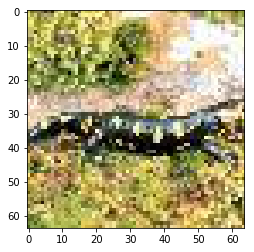

In [26]:
le = preprocessing.LabelEncoder()
training_le = le.fit(training_labels)
training_labels_encoded = training_le.transform(training_labels)
print ("First 30 Training Labels", training_labels_encoded[0:30])

numberssss = 29
print(training_labels_encoded[numberssss])
plt.imshow(training_images[numberssss].astype(np.int16))
plt.show()

In [5]:
! git all-go

[master 46e606050] s
 2 files changed, 230 insertions(+), 20 deletions(-)


The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
To https://github.com/JaeDukSeo/Daily-Neural-Network-Practice-2
   a31cfc2aa..46e606050  master -> master


# Reference 
1. Python3, S., Jungi, K., Shapovalov, R., Stuart, V., Coutinho, T., & ALBARÈDE, P. et al. (2013). StringIO in Python3. Stack Overflow. Retrieved 1 February 2019, from https://stackoverflow.com/questions/11914472/stringio-in-python3